# **Projeto de Bioinformática e Análise de Dados - Descoberta Computacional de Fármacos**

## **Análise Exploratória de Dados**


Neste Jupyter notebook, construiremos um modelo de aprendizado de máquina usando os dados de bioatividade do ChEMBL.

Realizaremos o Cálculo de Descritores e a Análise Exploratória de Dados.

---


## **Instalar sys**

In [35]:
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

## **Carregar dados de bioatividade**

In [36]:
import pandas as pd

In [37]:
df = pd.read_csv('dengue_bioactivity_data_preprocessed.csv')

## **Calcular Descritores de Lipinski**
Christopher Lipinski, um cientista da Pfizer, desenvolveu um conjunto de regras práticas para avaliar a **semelhança com fármacos** de compostos. Essa semelhança com fármacos é baseada na Absorção, Distribuição, Metabolismo e Excreção (ADME), também conhecida como o perfil farmacocinético. Lipinski analisou todos os medicamentos aprovados pela FDA com atividade oral na formulação do que ficou conhecido como a **Regra dos Cinco** ou **Regra de Lipinski**.

A Regra de Lipinski afirma o seguinte:
* Peso molecular < 500 Dalton
* Coeficiente de partição octanol-água (LogP) < 5
* Doadores de ligações de hidrogênio < 5
* Aceitadores de ligações de hidrogênio < 10


### **Importar bibliotecas**

In [38]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

### **Calcular descritores**

In [39]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem)
        moldata.append(mol)

    baseData= np.arange(1,1)
    i=0
    for mol in moldata:

        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])

        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1

    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)

    return descriptors

In [40]:
df_lipinski = lipinski(df.canonical_smiles)

### **Combinar DataFrames**

Vamos dar uma olhada nos 2 DataFrames que serão combinados.

In [41]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,409.486,2.1241,2.0,5.0
1,474.517,4.5496,1.0,6.0
2,582.678,6.0240,3.0,7.0
3,456.668,3.4091,4.0,6.0
4,481.118,2.8128,6.0,6.0
5,409.432,4.8883,2.0,3.0
6,985.127,0.6131,8.0,20.0
7,430.308,5.7610,2.0,6.0
8,373.334,4.9884,1.0,5.0
9,875.106,5.6014,3.0,14.0


In [42]:
df

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL2332247,O=C(CNCc1ccc(C(=O)N2CCCCC2)cc1)NC(=O)COc1ccccc1,100000.0,inactive
1,CHEMBL4175102,COc1ccc(-c2cc(-c3ccc4cc(F)ccc4n3)n(-c3ccc(S(N)...,730.0,active
2,CHEMBL4526128,O=C(N[C@@H](Cc1ccc(O)cc1)C(=O)O)c1cc(-c2ccccc2...,6800.0,intermediate
3,CHEMBL4443913,CCCCCCCCCCCCNCCNC(=O)C[C@@]1(O)C[C@@H](O)[C@@H...,6900.0,intermediate
4,CHEMBL4572441,CCCCCCCCCCCCCCNCCNC(=O)C[C@]1(O)C[C@@H](O)[C@@...,6500.0,intermediate
5,CHEMBL1138,O=C1[C@H](CC[C@H](O)c2ccc(F)cc2)[C@@H](c2ccc(O...,13070.0,inactive
6,CHEMBL506569,CC(=O)O[C@H]1C[C@H](O[C@H]2[C@@H](O)C[C@H](O[C...,500.0,active
7,CHEMBL5176406,FC(F)(F)Oc1cccc(Nc2ccnc(Nc3cccc(OC(F)(F)F)c3)n...,5000.0,intermediate
8,CHEMBL5182661,CC(=O)c1cccc(-c2cc(Nc3ccc(OC(F)(F)F)cc3)ncn2)c1,5000.0,intermediate
9,CHEMBL263291,CC[C@H](C)[C@H]1O[C@]2(CC[C@@H]1C)C[C@@H]1C[C@...,1660.0,intermediate


Agora, vamos combinar os 2 DataFrame

In [43]:
df_combined = pd.concat([df,df_lipinski], axis=1)

In [44]:
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL2332247,O=C(CNCc1ccc(C(=O)N2CCCCC2)cc1)NC(=O)COc1ccccc1,100000.0,inactive,409.486,2.1241,2.0,5.0
1,CHEMBL4175102,COc1ccc(-c2cc(-c3ccc4cc(F)ccc4n3)n(-c3ccc(S(N)...,730.0,active,474.517,4.5496,1.0,6.0
2,CHEMBL4526128,O=C(N[C@@H](Cc1ccc(O)cc1)C(=O)O)c1cc(-c2ccccc2...,6800.0,intermediate,582.678,6.0240,3.0,7.0
3,CHEMBL4443913,CCCCCCCCCCCCNCCNC(=O)C[C@@]1(O)C[C@@H](O)[C@@H...,6900.0,intermediate,456.668,3.4091,4.0,6.0
4,CHEMBL4572441,CCCCCCCCCCCCCCNCCNC(=O)C[C@]1(O)C[C@@H](O)[C@@...,6500.0,intermediate,481.118,2.8128,6.0,6.0
5,CHEMBL1138,O=C1[C@H](CC[C@H](O)c2ccc(F)cc2)[C@@H](c2ccc(O...,13070.0,inactive,409.432,4.8883,2.0,3.0
6,CHEMBL506569,CC(=O)O[C@H]1C[C@H](O[C@H]2[C@@H](O)C[C@H](O[C...,500.0,active,985.127,0.6131,8.0,20.0
7,CHEMBL5176406,FC(F)(F)Oc1cccc(Nc2ccnc(Nc3cccc(OC(F)(F)F)c3)n...,5000.0,intermediate,430.308,5.7610,2.0,6.0
8,CHEMBL5182661,CC(=O)c1cccc(-c2cc(Nc3ccc(OC(F)(F)F)cc3)ncn2)c1,5000.0,intermediate,373.334,4.9884,1.0,5.0
9,CHEMBL263291,CC[C@H](C)[C@H]1O[C@]2(CC[C@@H]1C)C[C@@H]1C[C@...,1660.0,intermediate,875.106,5.6014,3.0,14.0


### **Converter IC50 para pIC50**
Para permitir que os dados de **IC50** sejam distribuídos de forma mais uniforme, iremos converter **IC50** para a escala logarítmica negativa, que é essencialmente **-log10(IC50)**.

Esta função personalizada pIC50() aceitará um DataFrame como entrada e irá:
* Pegar os valores de IC50 da coluna ``standard_value`` e convertê-los de nM para M, multiplicando o valor por 10$^{-9}$
* Pegar o valor molar e aplicar -log10
* Excluir a coluna ``standard_value`` e criar uma nova coluna ``pIC50``


In [45]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', axis='columns') # Changed 1 to axis='columns'

    return x

Ponto a ser observado: valores maiores que 100.000.000 serão fixados em 100.000.000, caso contrário, o valor logarítmico negativo se tornará negativo.

In [46]:
df_combined.standard_value.describe()

count        10.000000
mean      14616.000000
std       30229.104519
min         500.000000
25%        2495.000000
50%        5750.000000
75%        6875.000000
max      100000.000000
Name: standard_value, dtype: float64

In [47]:
-np.log10( (10**-9)* 100000000 )

1.0

In [48]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [49]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', axis=1)

    return x

Primeiro, aplicaremos a função norm_value() para que os valores na coluna standard_value sejam normalizados.

In [50]:
df_norm = norm_value(df_combined)
df_norm

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL2332247,O=C(CNCc1ccc(C(=O)N2CCCCC2)cc1)NC(=O)COc1ccccc1,inactive,409.486,2.1241,2.0,5.0,100000.0
1,CHEMBL4175102,COc1ccc(-c2cc(-c3ccc4cc(F)ccc4n3)n(-c3ccc(S(N)...,active,474.517,4.5496,1.0,6.0,730.0
2,CHEMBL4526128,O=C(N[C@@H](Cc1ccc(O)cc1)C(=O)O)c1cc(-c2ccccc2...,intermediate,582.678,6.0240,3.0,7.0,6800.0
3,CHEMBL4443913,CCCCCCCCCCCCNCCNC(=O)C[C@@]1(O)C[C@@H](O)[C@@H...,intermediate,456.668,3.4091,4.0,6.0,6900.0
4,CHEMBL4572441,CCCCCCCCCCCCCCNCCNC(=O)C[C@]1(O)C[C@@H](O)[C@@...,intermediate,481.118,2.8128,6.0,6.0,6500.0
5,CHEMBL1138,O=C1[C@H](CC[C@H](O)c2ccc(F)cc2)[C@@H](c2ccc(O...,inactive,409.432,4.8883,2.0,3.0,13070.0
6,CHEMBL506569,CC(=O)O[C@H]1C[C@H](O[C@H]2[C@@H](O)C[C@H](O[C...,active,985.127,0.6131,8.0,20.0,500.0
7,CHEMBL5176406,FC(F)(F)Oc1cccc(Nc2ccnc(Nc3cccc(OC(F)(F)F)c3)n...,intermediate,430.308,5.7610,2.0,6.0,5000.0
8,CHEMBL5182661,CC(=O)c1cccc(-c2cc(Nc3ccc(OC(F)(F)F)cc3)ncn2)c1,intermediate,373.334,4.9884,1.0,5.0,5000.0
9,CHEMBL263291,CC[C@H](C)[C@H]1O[C@]2(CC[C@@H]1C)C[C@@H]1C[C@...,intermediate,875.106,5.6014,3.0,14.0,1660.0


In [51]:
df_norm.standard_value_norm.describe()

count        10.000000
mean      14616.000000
std       30229.104519
min         500.000000
25%        2495.000000
50%        5750.000000
75%        6875.000000
max      100000.000000
Name: standard_value_norm, dtype: float64

In [52]:
df_final = pIC50(df_norm)
df_final

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL2332247,O=C(CNCc1ccc(C(=O)N2CCCCC2)cc1)NC(=O)COc1ccccc1,inactive,409.486,2.1241,2.0,5.0,4.000000
1,CHEMBL4175102,COc1ccc(-c2cc(-c3ccc4cc(F)ccc4n3)n(-c3ccc(S(N)...,active,474.517,4.5496,1.0,6.0,6.136677
2,CHEMBL4526128,O=C(N[C@@H](Cc1ccc(O)cc1)C(=O)O)c1cc(-c2ccccc2...,intermediate,582.678,6.0240,3.0,7.0,5.167491
3,CHEMBL4443913,CCCCCCCCCCCCNCCNC(=O)C[C@@]1(O)C[C@@H](O)[C@@H...,intermediate,456.668,3.4091,4.0,6.0,5.161151
4,CHEMBL4572441,CCCCCCCCCCCCCCNCCNC(=O)C[C@]1(O)C[C@@H](O)[C@@...,intermediate,481.118,2.8128,6.0,6.0,5.187087
5,CHEMBL1138,O=C1[C@H](CC[C@H](O)c2ccc(F)cc2)[C@@H](c2ccc(O...,inactive,409.432,4.8883,2.0,3.0,4.883724
6,CHEMBL506569,CC(=O)O[C@H]1C[C@H](O[C@H]2[C@@H](O)C[C@H](O[C...,active,985.127,0.6131,8.0,20.0,6.301030
7,CHEMBL5176406,FC(F)(F)Oc1cccc(Nc2ccnc(Nc3cccc(OC(F)(F)F)c3)n...,intermediate,430.308,5.7610,2.0,6.0,5.301030
8,CHEMBL5182661,CC(=O)c1cccc(-c2cc(Nc3ccc(OC(F)(F)F)cc3)ncn2)c1,intermediate,373.334,4.9884,1.0,5.0,5.301030
9,CHEMBL263291,CC[C@H](C)[C@H]1O[C@]2(CC[C@@H]1C)C[C@@H]1C[C@...,intermediate,875.106,5.6014,3.0,14.0,5.779892


In [53]:
df_final.pIC50.describe()

count    10.000000
mean      5.321911
std       0.653236
min       4.000000
25%       5.162736
50%       5.244058
75%       5.660176
max       6.301030
Name: pIC50, dtype: float64

### **Removendo a classe de bioatividade 'intermediária' e 'nula'**
Aqui, removeremos a classe ``intermediária`` do nosso conjunto de dados.

In [54]:
df_2class = df_final[(df_final.bioactivity_class != 'intermediate')] #& (df_final.bioactivity_class.notna())]
df_2class

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL2332247,O=C(CNCc1ccc(C(=O)N2CCCCC2)cc1)NC(=O)COc1ccccc1,inactive,409.486,2.1241,2.0,5.0,4.000000
1,CHEMBL4175102,COc1ccc(-c2cc(-c3ccc4cc(F)ccc4n3)n(-c3ccc(S(N)...,active,474.517,4.5496,1.0,6.0,6.136677
5,CHEMBL1138,O=C1[C@H](CC[C@H](O)c2ccc(F)cc2)[C@@H](c2ccc(O...,inactive,409.432,4.8883,2.0,3.0,4.883724
6,CHEMBL506569,CC(=O)O[C@H]1C[C@H](O[C@H]2[C@@H](O)C[C@H](O[C...,active,985.127,0.6131,8.0,20.0,6.301030


---

## **Análise Exploratória de Dados (Análise do Espaço Químico) via descritores de Lipinski**

### **Importar biblioteca**

In [55]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

### **Gráfico de frequência das 2 classes de bioatividade**

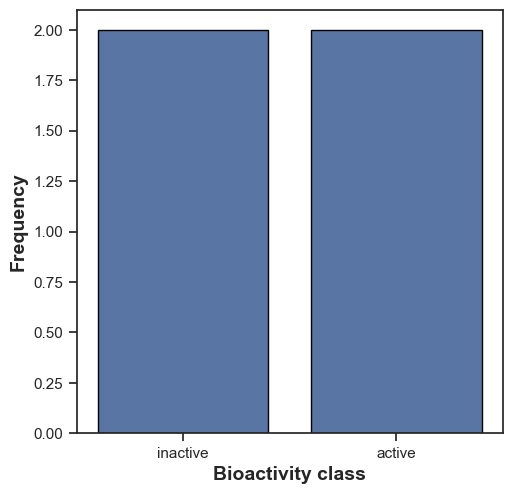

In [56]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='bioactivity_class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

O gráfico sugere que os dados estão razoavelmente equilibrados, com um número significativo de compostos em ambas as categorias.

### **Diagrama de dispersão de MW versus LogP**

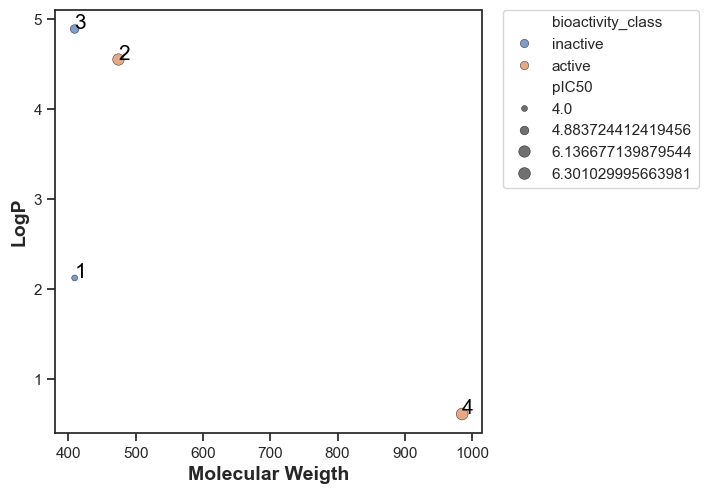

In [57]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='bioactivity_class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('Molecular Weigth', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
for i, (mw, logp) in enumerate(zip(df_2class['MW'], df_2class['LogP'])):
    plt.text(mw, logp, str(i+1), fontsize=15, color='black')
plt.savefig('plot_MW_vs_LogP.pdf')

1. Este composto é classificado como inativo e tem um peso molecular moderado e um LogP relativamente baixo, o que indica baixa lipofilicidade. O valor de pIC50 baixo também reforça sua baixa atividade.
2. Este composto ativo tem um peso molecular relativamente alto e um LogP elevado, o que indica uma maior lipofilicidade. O valor de pIC50 acima de 6 sugere uma boa atividade biológica.
3. Este composto é inativo apesar do LogP elevado. Seu pIC50 abaixo de 5 reflete baixa atividade, embora tenha um perfil químico semelhante ao de compostos mais lipofílicos.
4. Esse composto tem um peso molecular muito alto e um LogP muito baixo, indicando baixa lipofilicidade. Apesar disso, é altamente ativo, como mostra seu elevado pIC50, sugerindo que pode ter propriedades específicas que favorecem sua bioatividade.

Atividade x Propriedades Físico-Químicas: A presença de compostos ativos e inativos em diferentes faixas de peso molecular e lipofilicidade indica que não há uma relação simples entre essas propriedades e a bioatividade. No entanto, compostos ativos tendem a ter pIC50 mais elevados, refletindo maior potência.
Lipofilicidade: Compostos com LogP mais elevado geralmente são mais lipofílicos, mas isso não garante bioatividade, como no caso de CHEMBL1138, que é inativo apesar do alto LogP.
Peso Molecular: Compostos com peso molecular maior, como CHEMBL506569, podem ser ativos mesmo com baixa lipofilicidade, sugerindo que outros fatores, como a estrutura molecular e a afinidade com o alvo biológico, desempenham um papel importante na atividade.

### **Diagramas de caixa**

#### **valor pIC50**

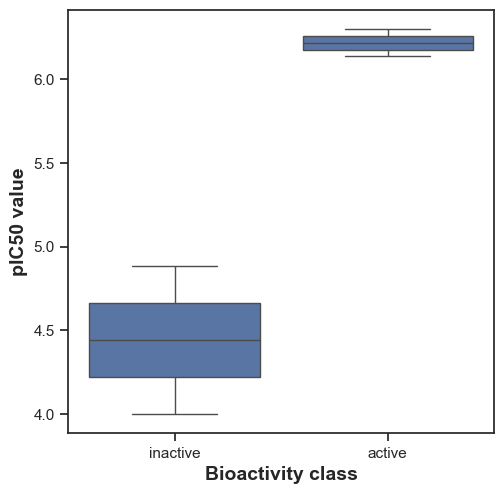

In [58]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

Classe Inativa:

O valor de pIC50 para os compostos inativos está concentrado em torno de 4.0 a 5.0. Isso indica baixa potência para esses compostos, o que é consistente com sua classificação como inativos.
A mediana está próxima de 4.5, sugerindo que a maioria dos compostos inativos tem potências muito baixas.
Classe Ativa:

Para os compostos ativos, os valores de pIC50 estão concentrados entre 5.5 e 6.0, indicando uma potência maior.
A mediana está claramente mais alta do que na classe inativa, próxima de 6.0, o que mostra que compostos classificados como ativos têm, em geral, uma potência significativamente maior.

O boxplot revela uma separação clara entre as classes de compostos ativos e inativos em termos de pIC50. Os compostos ativos possuem valores de pIC50 consistentemente maiores, o que confirma sua maior eficácia em relação aos compostos inativos.
Esse gráfico é uma boa ferramenta para visualizar a diferença de potência entre as classes de bioatividade, mostrando que compostos com maior pIC50 tendem a ser mais ativos.

**Análise estatística | Teste U de Mann-Whitney**

In [59]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  active = df[df.bioactivity_class == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  inactive = df[df.bioactivity_class == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'

  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [60]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,4.0,0.333333,0.05,Same distribution (fail to reject H0)


Com base nesses resultados, podemos concluir que não há uma diferença estatisticamente significativa entre os valores de pIC50 nas classes "ativa" e "inativa". Isso sugere que a distribuição de pIC50 é semelhante entre essas duas classes de compostos. Portanto, não há indícios de que a potência (pIC50) dos compostos ativos e inativos seja diferente no contexto analisado.

#### **Molecular Weight**

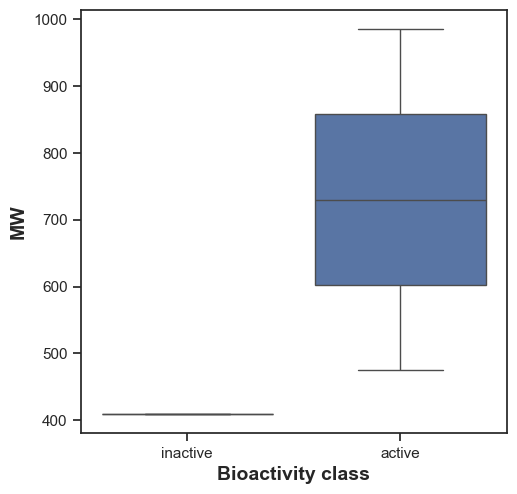

In [61]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

Classe Inativa:

Os compostos inativos têm pesos moleculares concentrados entre 400 e 500. Isso indica que compostos com pesos moleculares relativamente menores estão tendendo a ser inativos.
A mediana da classe inativa está próxima de 400, sugerindo que a maioria dos compostos inativos tem pesos moleculares baixos.
Classe Ativa:

Para os compostos ativos, os pesos moleculares se distribuem em uma faixa mais ampla, de aproximadamente 400 até quase 1000.
A mediana para os compostos ativos está significativamente mais alta, em torno de 800, indicando que compostos mais pesados tendem a ser classificados como ativos.
Conclusão:
Diferença Visível: O gráfico sugere uma diferença visível entre os compostos ativos e inativos em termos de peso molecular. Compostos com maior peso molecular parecem estar mais frequentemente associados à bioatividade, enquanto os compostos inativos possuem pesos moleculares menores.
Distribuição: A faixa de variação dos pesos moleculares dos compostos ativos é bem mais ampla, sugerindo que compostos com pesos moleculares maiores têm maior probabilidade de serem bioativos.

In [62]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,4.0,0.333333,0.05,Same distribution (fail to reject H0)


Com base nesses resultados, podemos concluir que não há uma diferença estatisticamente significativa entre os valores de pIC50 nas classes "ativa" e "inativa". Isso sugere que a distribuição de pIC50 é semelhante entre essas duas classes de compostos. Portanto, não há indícios de que a potência (pIC50) dos compostos ativos e inativos seja diferente no contexto analisado.

#### **LogP**

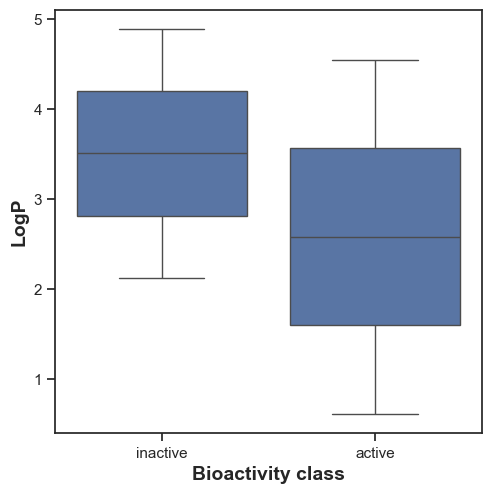

In [63]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

Elementos do Gráfico:
Eixo X (Bioactivity Class): Mostra as classes de bioatividade — "inactive" (inativo) e "active" (ativo).
Eixo Y (LogP): Representa o coeficiente de partição octanol-água (LogP), que mede a lipofilicidade dos compostos. A escala varia de aproximadamente 1 a 5.
Interpretação:
Classe Inativa:
Os compostos inativos apresentam LogP concentrado entre 2.0 e 5.0. A mediana está em torno de 4.0, indicando que a maioria dos compostos inativos tem uma lipofilicidade moderada a alta.
Classe Ativa:
Os compostos ativos têm uma distribuição de LogP entre 1.0 e 5.0, com uma mediana em torno de 4.5. Isso sugere que os compostos ativos tendem a ser um pouco mais lipofílicos do que os compostos inativos, embora haja sobreposição nas faixas de LogP.
Conclusão:
Diferença Moderada: Embora compostos ativos tenham um LogP ligeiramente maior em média, a sobreposição significativa entre as classes indica que o LogP sozinho não é um fator determinante na diferenciação entre compostos ativos e inativos.
Distribuição Semelhante: Tanto compostos ativos quanto inativos mostram uma distribuição ampla de LogP, com uma concentração maior em valores entre 3 e 5, o que sugere que a lipofilicidade tem um papel importante, mas não exclusivo, na bioatividade dos compostos.
Esse gráfico sugere uma distribuição semelhante para as duas classes, com uma leve tendência de compostos ativos apresentarem LogP mais alto.

**Análise estatística | Teste U de Mann-Whitney**

In [64]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,1.0,0.666667,0.05,Same distribution (fail to reject H0)


Com base nesses resultados, podemos concluir que não há uma diferença estatisticamente significativa entre os valores de pIC50 nas classes "ativa" e "inativa". Isso sugere que a distribuição de pIC50 é semelhante entre essas duas classes de compostos. Portanto, não há indícios de que a potência (pIC50) dos compostos ativos e inativos seja diferente no contexto analisado.

#### **NumHDonors**

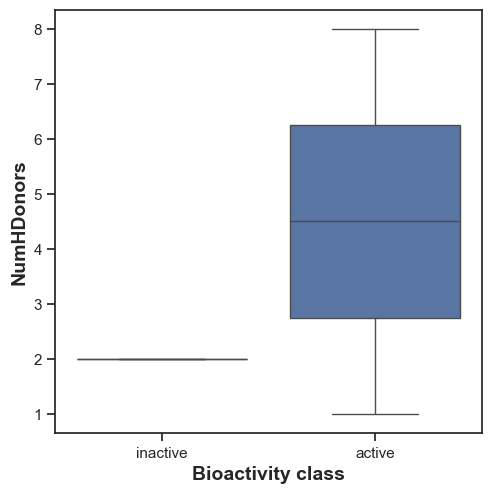

In [65]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

Interpretação:
Classe Inativa:
Os compostos inativos possuem NumHDonors variando entre 2 e 5, com a mediana próxima de 3. Isso indica que a maioria dos compostos inativos tem um número moderado de doadores de hidrogênio.
Classe Ativa:
Os compostos ativos têm uma maior variação no número de doadores de hidrogênio, entre 1 e 8. A mediana para essa classe está próxima de 4, o que sugere que compostos ativos tendem a ter mais doadores de hidrogênio em comparação com os compostos inativos.
Conclusão:
Diferença Visível: Compostos ativos possuem uma faixa mais ampla de NumHDonors, com valores mais altos quando comparados aos compostos inativos, sugerindo que compostos com maior número de doadores de hidrogênio tendem a ser mais bioativos.
Distribuição: A classe ativa tem uma distribuição mais dispersa e inclui compostos com até 8 doadores de hidrogênio, o que pode indicar uma relação positiva entre o número de doadores de hidrogênio e a atividade biológica.
Esse gráfico sugere que o número de doadores de hidrogênio pode ser um fator relevante para determinar a bioatividade, já que compostos ativos possuem mais doadores em média​

**Análise estatística | Teste U de Mann-Whitney**

In [66]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,2.0,1.0,0.05,Same distribution (fail to reject H0)


#### **NumHAcceptors**

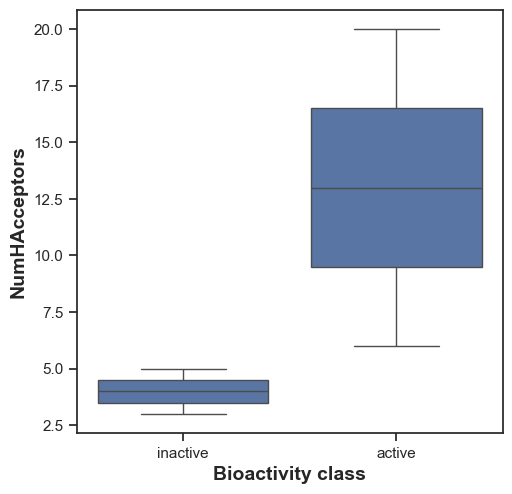

In [67]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

Interpretação:
Classe Inativa:
Os compostos inativos apresentam um número de aceitadores de hidrogênio que varia entre 5 e 10, com a mediana próxima de 7.5. Isso indica que a maioria dos compostos inativos tem um número moderado de aceitadores de hidrogênio.
Classe Ativa:
Os compostos ativos possuem uma distribuição mais ampla, com NumHAcceptors variando de aproximadamente 5 a 20, sendo a mediana por volta de 15. Isso sugere que compostos bioativos tendem a ter mais aceitadores de hidrogênio.
Conclusão:
Diferença Visível: O gráfico indica que os compostos ativos tendem a ter um número significativamente maior de aceitadores de hidrogênio em comparação com os compostos inativos.
Distribuição: A faixa de aceitadores de hidrogênio nos compostos ativos é mais ampla, sugerindo que compostos com mais de 10 aceitadores de hidrogênio são mais propensos a serem bioativos.
Esse padrão sugere que o número de aceitadores de hidrogênio pode estar correlacionado com a bioatividade dos compostos, sendo um fator importante para determinar a eficácia biológica​

In [68]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,4.0,0.333333,0.05,Same distribution (fail to reject H0)


Considerações Finais:
O peso molecular (MW) e o número de aceitadores de hidrogênio parecem ser os fatores mais diferenciadores entre compostos bioativos e inativos.
Embora o LogP e o número de doadores de hidrogênio também mostrem alguma variação, as diferenças não são tão marcantes quanto em MW e NumHAcceptors.
A bioatividade dos compostos parece ser correlacionada com o aumento da complexidade molecular (maior peso molecular e maior número de doadores/aceitadores de hidrogênio).